In [2]:
import cv2
import imutils
import numpy as np
import random
from os import listdir
from os.path import isfile, join
import io
from IPython.display import display
from PIL import Image
import time

In [3]:
ref = cv2.imread("/mnt/nvme-storage/pfauregi/datasets/atlas/ref_img.png")
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
src = cv2.imread("/mnt/nvme-storage/pfauregi/atlas/ra/RA_FSBH_1969.png")
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


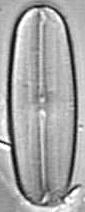

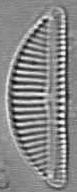

In [34]:
display(Image.fromarray(src))
display(Image.fromarray(ref))

In [35]:
ref_histo, bins = np.histogram(ref.flatten(), 256, [0,256])
src_histo, bins = np.histogram(src.flatten(), 256, [0,256])
ref_cdf = ref_histo.cumsum()
src_cdf = src_histo.cumsum()

In [36]:
lookup_table = np.zeros(256)
lookup_val = 0
for src_pixel_val in range(len(src_cdf)):
    lookup_val
    for ref_pixel_val in range(len(ref_cdf)):
        if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
            lookup_val = ref_pixel_val
            break
    lookup_table[src_pixel_val] = lookup_val

In [37]:
corrected_src = cv2.LUT(src, lookup_table)
corrected_src = cv2.convertScaleAbs(corrected_src)

In [ ]:
display(Image.fromarray(src))
display(Image.fromarray(ref))
display(Image.fromarray(corrected_src))